In [261]:
from Exercises import Ex1
from Exercises import Ex2
import importlib
from bs4 import BeautifulSoup
importlib.reload(Ex2)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


## Exercise 1

In [101]:
mdl = Ex1.getEntrezData('https://eutils.ncbi.nlm.nih.gov/entrez/eutils/')

params = {
    "db": 'pubmed',
    "term":'cancer',
    "datetype":"pdat",
    "mindate":"2019",
    "maxdate":"2019",
    "retmax":'1000',
    "retmode":'xml'

}

mdl.getFullRecords(params,parse_records=True)

200 https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&term=cancer&datetype=pdat&mindate=2019&maxdate=2019&retmax=1000&retmode=xml
200 https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi


#### Since I load data below, checking for common overlapping papers in Exercise 2

#### For Abstract Texts, I appended them into a list, even though when we run SPECTER I just join them with spaces. Could have done that from the get go but I thought having a list is convenient if we ever need to look at just a specific para or count length of paras etc.

## Exercise 2

In [262]:
meshTerms_obj = Ex2.meshTerms('2021-11-01_searched_term_cancer.json','2021-11-01_searched_term_Alzheimer.json')
summary_table,df_alzheimer_t5,df_cancer_t5 = meshTerms_obj.genSummary(nLargest = 5)

In [263]:
dfCancer,dfAlzheimer = meshTerms_obj.getData()

#### Checking for any common papers (Part of Exercise 1). There seem to be 2 papers in common

In [280]:
set(dfCancer.index).intersection(set(dfAlzheimer.index))

{'32501203', '32529139'}

## Fraction of papers with no mesh terms

In [146]:
len(dfCancer[dfCancer['mesh_terms'].str.len() == 0])/len(dfCancer)

0.755

In [147]:
len(dfAlzheimer[dfAlzheimer['mesh_terms'].str.len() == 0])/len(dfAlzheimer)

0.154

In [9]:
dfCancer[dfCancer['mesh_terms'].str.len() == 0]

,ArticleTitle,AbstractText,query,mesh_terms
1971-02-06 15:31:02,Inhibition of microRNA-103a inhibits the activ...,[The aim of this study is to explore the effec...,cancer,[]
1971-02-06 12:41:25,"A green, efficient and precise hydrogen therap...",[By combined use of traditional Chinese acupun...,cancer,[]
1971-02-06 12:39:53,"Sin1-mediated mTOR signaling in cell growth, m...",[The mammalian target of rapamycin (mTOR) is a...,cancer,[]
1971-02-06 12:39:52,Influence of the microbiota on epigenetics in ...,[Colorectal cancer is one of the most common m...,cancer,[]
1971-02-06 12:39:50,Phenotype and target-based chemical biology in...,[Chemical biology has been attracting a lot of...,cancer,[]
...,...,...,...,...
1971-01-10 23:50:29,Skeletal Muscle Loss during Tyrosine Kinase In...,[The measurement of body composition such as t...,cancer,[]
1971-01-10 23:43:08,Factors Influencing the Onset of Neoadjuvant T...,[Time to treatment onset (TTTO) is critical in...,cancer,[]
1971-01-10 23:43:06,EVA-Scalp: Evaluation of Patient Satisfaction ...,[Scalp cooling (SC) offers a chance to reduce ...,cancer,[]
1971-01-10 23:43:05,Use of Complementary and Alternative Medicine ...,[Complementary and alternative medicine (CAM) ...,cancer,[]


In [10]:
dfAlzheimer[dfAlzheimer['mesh_terms'].str.len() == 0]

,ArticleTitle,AbstractText,query,mesh_terms
1971-02-06 12:41:35,Au23(CR)14 nanocluster restores fibril Aβ's un...,[The misfolding of amyloid-β (Aβ) peptides fro...,Alzheimer,[]
1971-02-06 12:40:00,High-resolution mapping of brain vasculature a...,[Accumulating evidence indicates the critical ...,Alzheimer,[]
1971-01-28 19:35:49,Electroconvulsive Therapy for the Treatment of...,[Dementia refers to a state of cognitive impai...,Alzheimer,[]
1971-01-27 16:16:47,Gintonin facilitates brain delivery of donepez...,[Gintonin is a ginseng-derived exogenous G-pro...,Alzheimer,[]
1971-01-25 05:05:20,Bayesian Scalar on Image Regression With Nonig...,[Medical imaging has become an increasingly im...,Alzheimer,[]
...,...,...,...,...
1971-01-03 11:20:20,Reversion From Mild Cognitive Impairment To No...,[Relatively little attention has been paid to ...,Alzheimer,[]
1971-01-03 09:41:35,Direct reprogramming of terminally differentia...,[Glial activation is a common pathological pro...,Alzheimer,[]
1971-01-03 08:02:56,The retinal choroid as an oculovascular biomar...,[Previous in vivo optical coherence tomography...,Alzheimer,[]
1971-01-03 07:47:46,A Machine Learning Method for Identifying Crit...,[Background: Alzheimer's disease (AD) is the m...,Alzheimer,[]


I'm not very sure why this is so but my guess would be that cancer is a broader term and would have a lot more articles and papers in comparison to Alzheimers. This also means a larger number of papers with missing mesh terms. Alternatively we perhaps took just the first 1000 papers and it just so happens that a larger chunk of those first 1000 papers had mesh terms missing. Maybe its a combination of both the factors.

#### Top 10 mesh terms for Alzheimers and cancer

In [158]:
df_alzheimer_t10 = meshTerms_obj.getMeshTermCounts(dfAlzheimer)
df_cancer_t10 = meshTerms_obj.getMeshTermCounts(dfCancer)

In [159]:
df_cancer_t10

,mesh_terms,counts
603,Humans,225
480,Female,96
794,Male,64
854,Middle Aged,63
26,Aged,54
22,Adult,53
49,Animals,33
1224,Retrospective Studies,28
27,"Aged, 80 and over",21
1396,Treatment Outcome,20


In [160]:
df_alzheimer_t10

,mesh_terms,counts
1764,Humans,716
2043,Male,356
1482,Female,304
66,Aged,289
441,Animals,264
67,"Aged, 80 and over",174
2201,Middle Aged,150
2157,Mice,121
1280,"Disease Models, Animal",106
384,Amyloid beta-Peptidesmetabolism,88


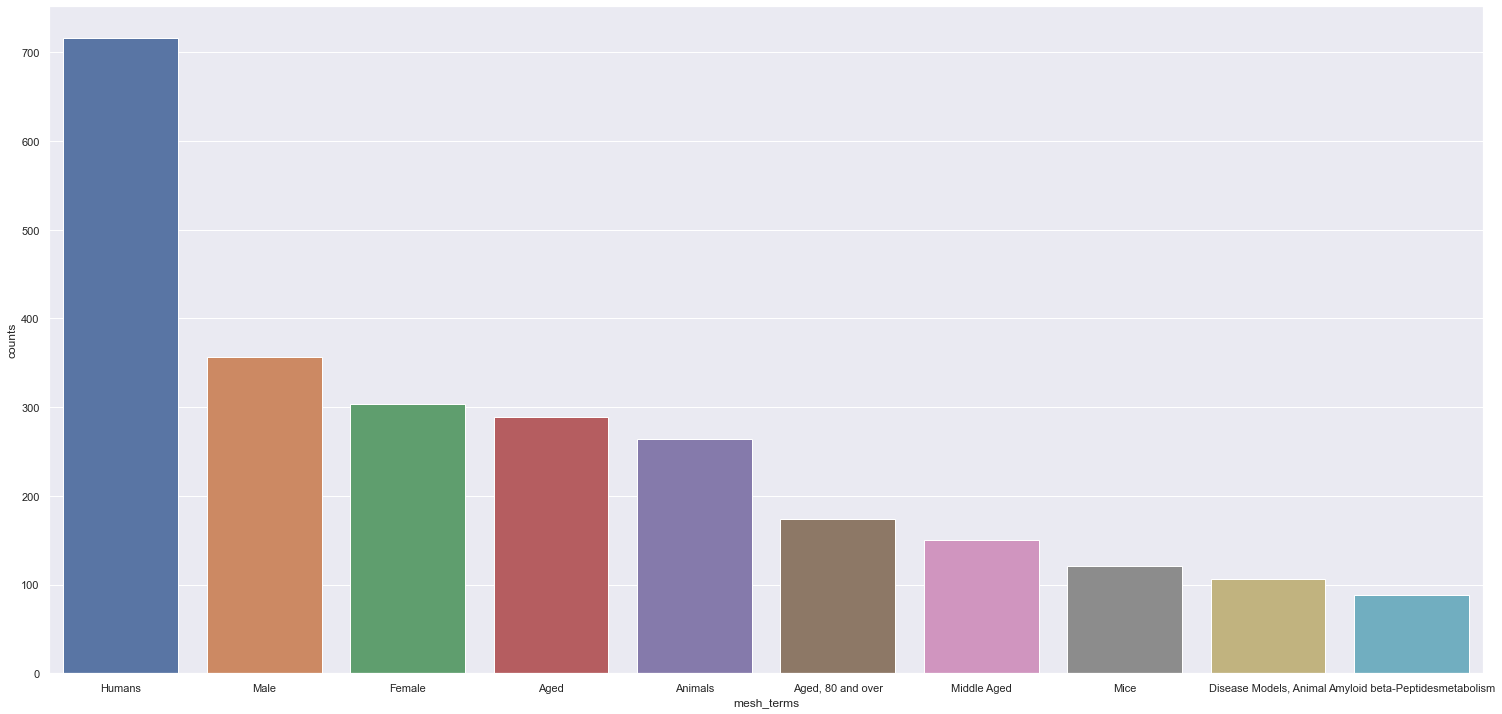

In [13]:
meshTerms_obj.plotMeshTermCounts(df_alzheimer_t10)

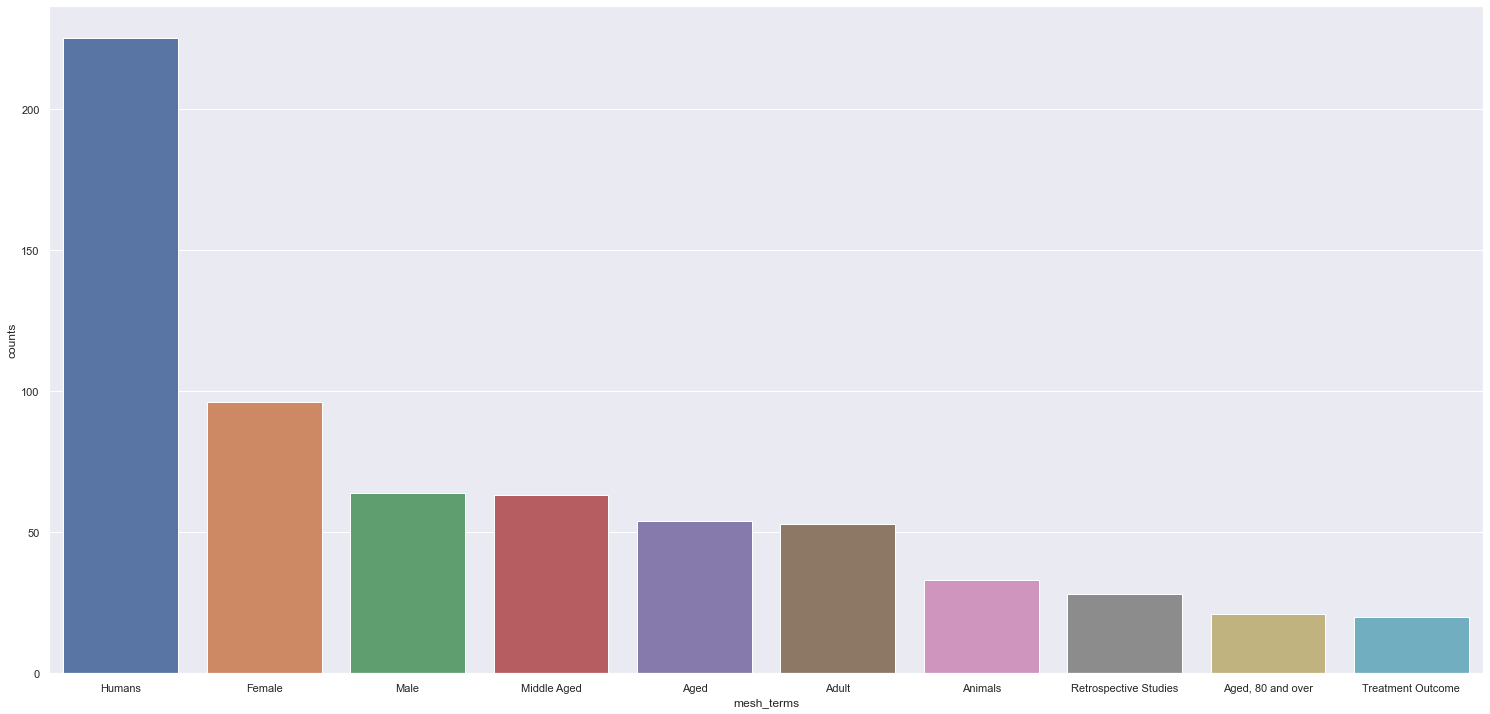

In [14]:
meshTerms_obj.plotMeshTermCounts(df_cancer_t10)

## Summary Table

#### Looking simply at the common terms' sum

In [274]:
summary_table

mesh_terms,Humans,Female,Male,Middle Aged,Aged
mesh_terms,,,,,
Humans,941,0,0,0,0
Male,0,0,420,0,0
Female,0,400,0,0,0
Aged,0,0,0,0,343
Animals,0,0,0,0,0


#### Create the dataframe with sums of terms with common occurence 

In [275]:
import pandas as pd
df_summaryTable = pd.DataFrame(0,index = df_alzheimer_t5['mesh_terms'],columns = df_cancer_t5['mesh_terms'])

In [277]:
count = 0
def check_terms(x,t1,t2):
    global count
    if((t1 in x) and (t2 in x)):
     count+=1
    
for row in df_summaryTable.index:
    for column in df_summaryTable:
        count = 0
        dfCancer['mesh_terms'].apply(check_terms,args = (row,column))
        dfAlzheimer['mesh_terms'].apply(check_terms,args = (row,column))
        df_summaryTable.loc[row,column] = count
df_summaryTable


mesh_terms,Humans,Female,Male,Middle Aged,Aged
mesh_terms,,,,,
Humans,941,388,377,213,343
Male,377,334,420,184,290
Female,388,400,334,196,297
Aged,343,297,290,179,343
Animals,160,37,87,5,13


Here we can see that the top 5 terms are quite generic with Humans being the most generic term and hence having highest occurence. Occurence of male and female terms is roughly the same with a big chunk of papers mentioning both male and female. We can also see a slightly higher occurence of female and middle aged than male and middle aged. Animals and Males also have a significantly higher number than Animals and female, lol.

I think having a word cloud or a graph weighted by occurence might be good ways of visualizing relationships. We should also probably look beyond top 5 terms to get more intricate relationships since top 5 terms are generic

## Exercise 3

In [4]:
from transformers import AutoTokenizer, AutoModel

# load model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('allenai/specter')
model = AutoModel.from_pretrained('allenai/specter')

In [6]:
dfCancer['AbstractText'][0]

['The aim of this study is to explore the effect of microRNA-103a (miR-103a) on astrocytes activation and hippocampal neuron injury in epilepsy rats by targeting brain-derived neurotrophic factor (BDNF).',
 'The epilepsy rat model was induced by intraperitoneal injection of lithium chloride-pilocarpine. Successful modeled rats were intralateroventricularly microinjected with miR-103a inhibitors, inhibitors negative control (NC), siRNA-NC and BDNF-siRNA, respectively. The RT-qPCR and western blot analysis were used to detect the expression of miR-103a, BDNF and glial fibrillary acidic protein (GFAP) in hippocampus tissues of rats. TUNEL staining was used to detect the apoptosis of hippocampal neurons. The RT-PCR and ELISA was used to detect the levels of TNF-α and IL-6 in hippocampal tissues and in serum, respectively.',
 'Increased expression of miR-103a, GFAP, and number of apoptotic neurons, decreased expression of BDNF and number of surviving neurons were found in hippocampus tissue

In [7]:
dfCancer['raw_data'] = dfCancer.apply(lambda x: x.ArticleTitle + tokenizer.sep_token + " ".join(x.AbstractText), axis = 1)
dfAlzheimer['raw_data'] = dfAlzheimer.apply(lambda x: x.ArticleTitle + tokenizer.sep_token + " ".join(x.AbstractText), axis = 1)

In [8]:
inputs_ = list(dfCancer['raw_data'].values) + list(dfAlzheimer['raw_data'].values)

In [9]:
import sys
sys.getsizeof(inputs_)

16056

In [27]:
from tqdm.notebook import tqdm
i = 0
resultList = []
progress_bar = tqdm(total = len(inputs_))
while(i<= len(inputs_) - 5):
    inputs = tokenizer(inputs_[i:i+5], padding=True, truncation=True, return_tensors="pt", max_length=512)
    result = model(**inputs)
    embeddings = result.last_hidden_state[:, 0, :].detach().numpy()
    resultList.append(embeddings)
    i = i+5
    progress_bar.update(5)
progress_bar.close()


  0%|          | 0/2000 [00:00<?, ?it/s]

In [19]:
type(result.last_hidden_state[:, 0, :].detach().numpy())

numpy.ndarray

In [44]:
len(resultList)

400

In [58]:
embeddings_ = np.concatenate(resultList,axis = 0)

In [62]:
embeddings_

array([[-0.95763636,  1.4301409 ,  1.1228242 , ..., -0.03607133,
         0.20760363,  0.02693233],
       [-0.4265511 ,  0.08982575,  0.718732  , ...,  0.06182588,
         0.5846192 ,  0.7131136 ],
       [-0.8543758 ,  0.93917614,  0.32482988, ..., -0.38092914,
        -0.3155064 , -0.66389316],
       ...,
       [-0.08508761,  1.3536129 ,  0.33352885, ..., -0.43458354,
         0.8139378 ,  0.32605827],
       [-0.27397034,  1.0678338 ,  0.6227128 , ..., -0.40509138,
         0.30919558, -0.62933475],
       [-0.7219894 ,  0.5914876 , -0.9859485 , ...,  0.7520864 ,
        -0.29950064,  0.46515658]], dtype=float32)

In [64]:
from sklearn import decomposition
import pandas as pd
pca = decomposition.PCA(n_components=3)
embeddings_pca = pd.DataFrame(
    pca.fit_transform(embeddings_),
    columns=['PC0', 'PC1', 'PC2']
)

In [70]:
# first 1000 were cancer articles, next 1000 were alzheimers papers, used just the single query in the api.
embeddings_pca['query'] = ''
embeddings_pca['query'][0:1000] = dfCancer['query'][0]
embeddings_pca['query'][1000:] = dfAlzheimer['query'][0]  ### should use pd.iat or some such function to get rid of the warning.


<ipython-input-70-de54afe4b2d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  embeddings_pca['query'][0:1000] = dfCancer['query'][0]
<ipython-input-70-de54afe4b2d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  embeddings_pca['query'][1000:] = dfAlzheimer['query'][0]


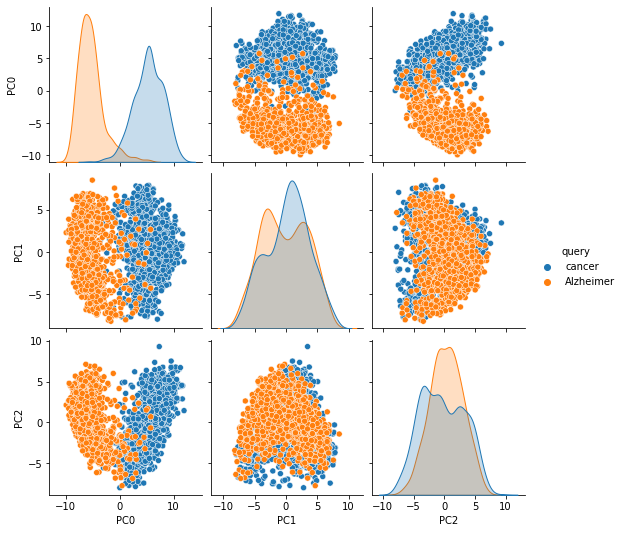

In [78]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(embeddings_pca,hue = 'query')

#### Here PC0 seems to be great, especially with PC2 and okayish with PC1 when it comes to separability. Data is undistinguishable across PC1 and PC2 though. Probably since PC0 must be capturing most variablity followed by PC1 and PC2 but not sure about that reasoning though

#### Saving resultList as a .npy file

In [46]:
import numpy as np
import os
fileName = "embeddings.npy"
path_  = os.getcwd() + "/Data/" + fileName
np.save(path_,resultList)

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [84]:
lda = LinearDiscriminantAnalysis(n_components=1)
categories = list(embeddings_pca['query'].values)
embeddings_lda = pd.DataFrame(
  lda.fit_transform(embeddings_, categories), columns=["lda0"]
)
embeddings_lda['query'] = categories

In [85]:
embeddings_lda

,lda0,query
0,1.416132,cancer
1,4.204022,cancer
2,3.342994,cancer
3,2.579909,cancer
4,4.968181,cancer
...,...,...
1995,-2.532622,Alzheimer
1996,-4.293888,Alzheimer
1997,-5.947868,Alzheimer
1998,-5.280495,Alzheimer


<AxesSubplot:xlabel='lda0', ylabel='query'>

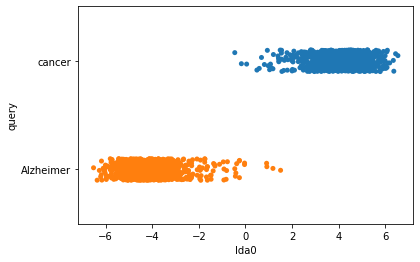

In [91]:
sns.stripplot(x = 'lda0',y = 'query',data = embeddings_lda)

<AxesSubplot:xlabel='lda0', ylabel='query'>

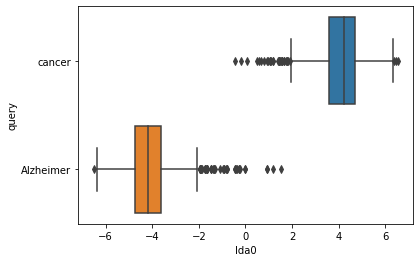

In [93]:
sns.boxplot(x = "lda0",y = "query",data = embeddings_lda)

#### Since there were 2 categories which means 1 lda vector will be generated. I chose to create a stripplot which is ideal if one of the variables is categorical and also a box plot to see the spread, since lda tries to maximize separability between classes while keeping members of each class close together by minimizing variance among the class. This is kinda evident in the box plot. Lda also seems like possibly the slightly better choice than PCA here given how well we observe the separability, PCA had a little bit more noise with some points deep within the other class's cluster.

## Exercise 4 

#### Implementing parallelized merge sort

In [10]:
from Exercises import Ex4
from time import perf_counter
import importlib
import numpy as np
importlib.reload(Ex4)
lst = np.array([100,99,95,2,3,1,4,5])
t_start = perf_counter()
l2 = Ex4.mergeSort_parallelized(lst)
t_stop = perf_counter()
print(t_stop-t_start)


0.4676948750000065


In [135]:
lst = np.array([1,5,2,0])
lst2 = lst.copy()
lst2.sort()

#### Running the test

In [14]:
from Exercises import test
importlib.reload(test)
arr_size = [1,10,100,1000,10000,100000,500000]

vals = test.run_test(arr_size)


In [15]:
vals

{'parallel': {'1': 0.38196349999998347,
  '10': 0.3777509999999893,
  '100': 0.3939482909997878,
  '1000': 0.38415758299993286,
  '10000': 0.564704249999977,
  '100000': 4.195562999999993,
  '500000': 55.981015166999896},
 'regular': {'1': 8.33000058264588e-07,
  '10': 0.00019304200009173655,
  '100': 0.002907000000050175,
  '1000': 0.0418037499998718,
  '10000': 0.5976160830000481,
  '100000': 9.829663499999924,
  '500000': 105.53251700100009}}

#### For a million, the time taken by the regular algorithm is about 2 times